<a href="https://colab.research.google.com/github/AngieOrtega09/Trabajo_Final_VPN/blob/main/Finanzas_computacionales_definitivo_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving BD2025_01.xlsx to BD2025_01 (4).xlsx

Análisis exploratorio:
Acción con mayor rentabilidad promedio mensual: CEMARGOS 
Acción con el mayor valor mensual de rentabilidad positiva: CEMARGOS 
Acción con mayor rentabilidad acumulada total: PROMIG 
Acción más volátil: CNEC 

Cantidad de meses con rentabilidad negativa por acción:
PFBCOLO      75
BCOLO        78
ECOPETL      77
ISA          77
GEB          78
CEMARGOS     78
GRUPOARG     74
PFAVAL       82
GRUPOSUR     84
PFDAVVND     77
CELSIA       83
CORFICOL     71
GRUPOBOL     81
PROMIG       72
BOGOTA       85
MINEROS      87
PFCORCOL     81
CNEC         86
ETB          94
COLCAP       80
Name: meses_negativos, dtype: int64

Acciones con más del 70% de meses con rentabilidad positiva:
Ninguna acción superó el 70% de meses con rentabilidad positiva.


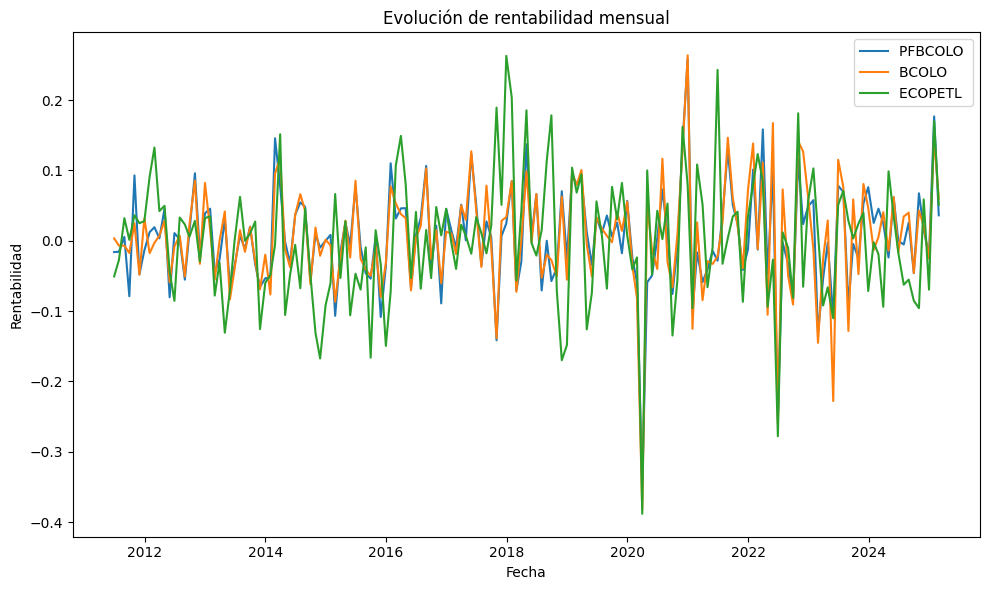

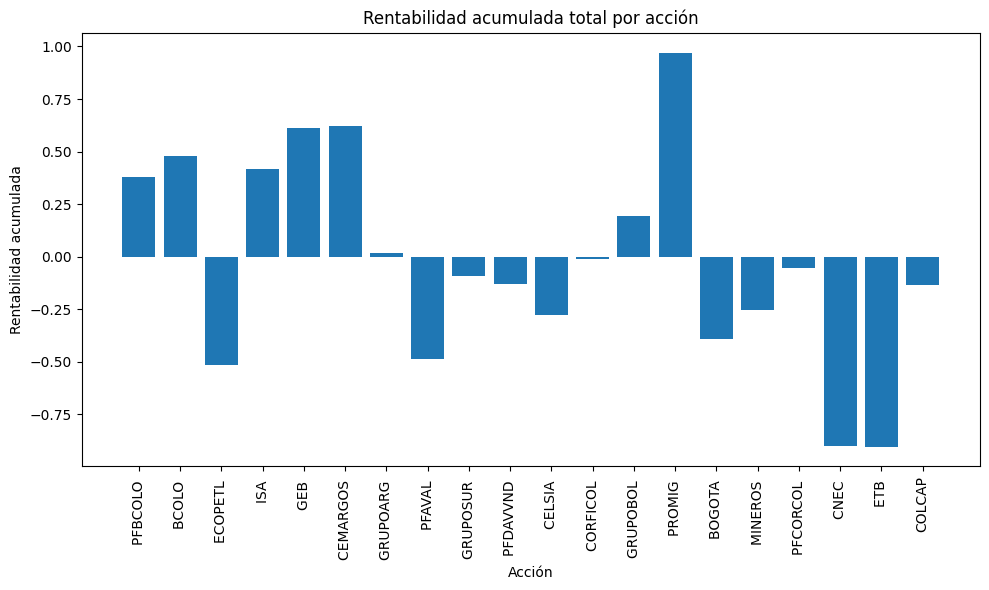

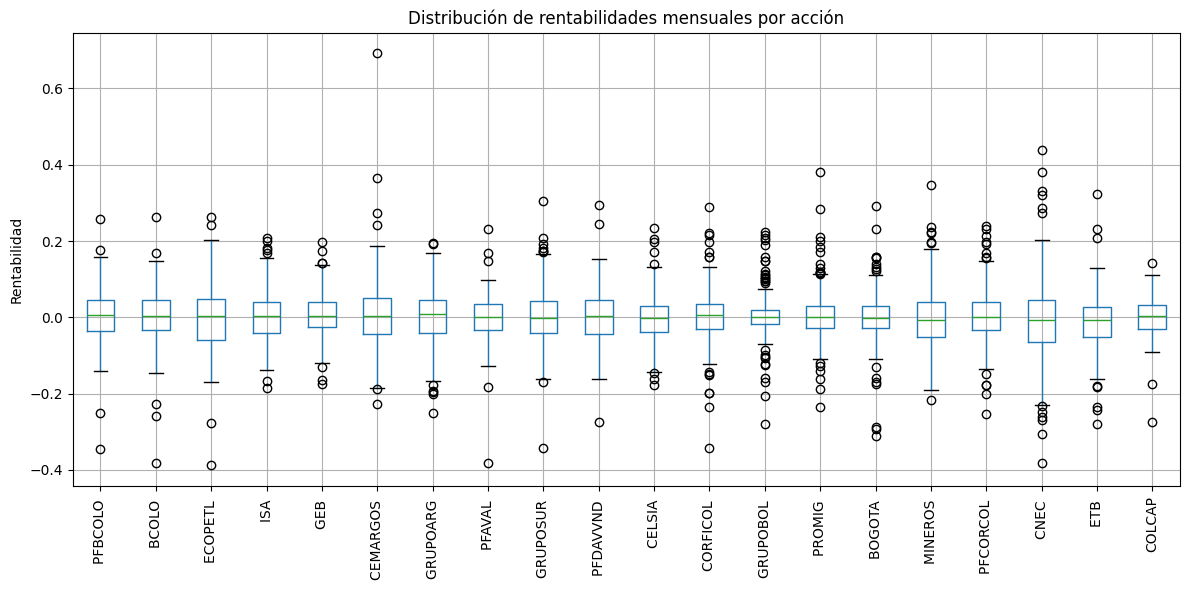

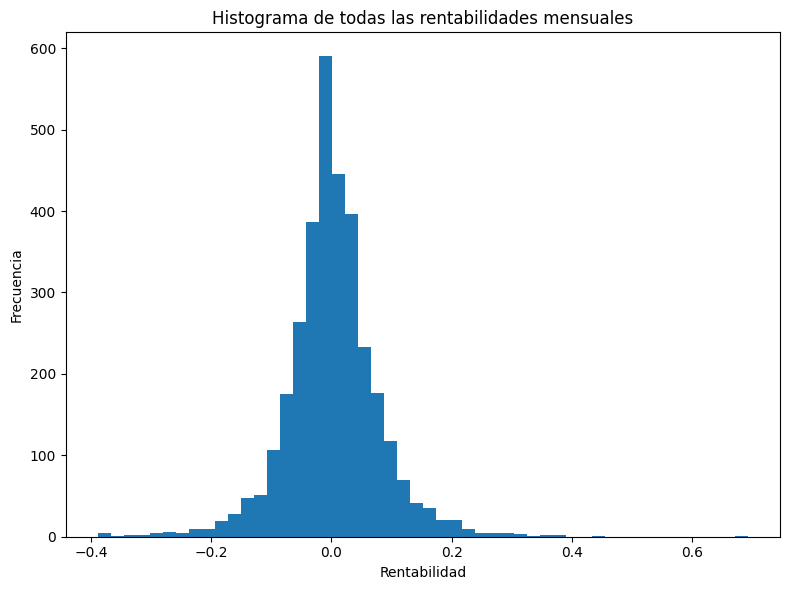

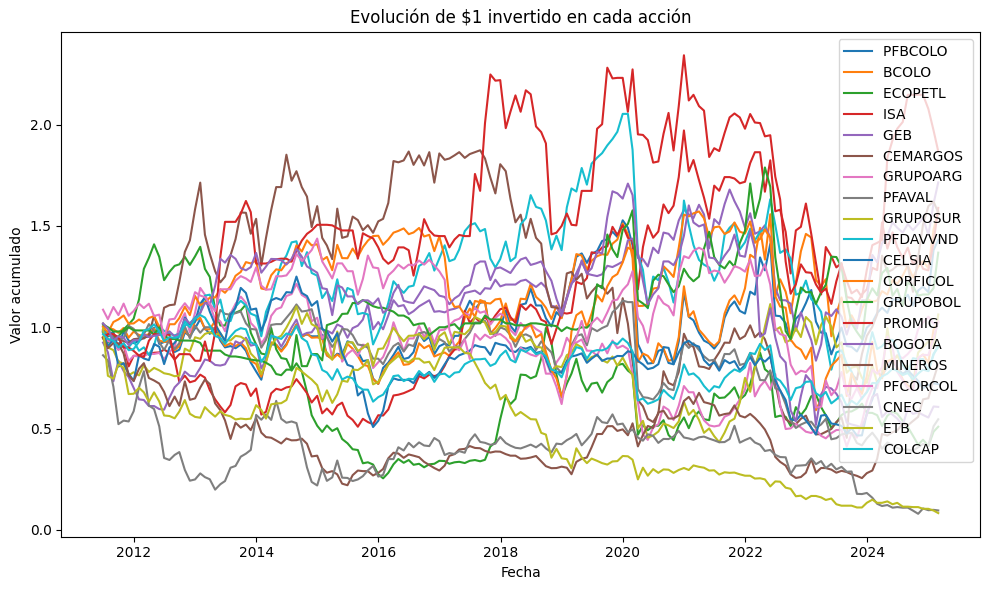


Resultados exportados correctamente a: resultados_analisis.xlsx


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

# === Paso previo: subir archivo Excel desde tu computador ===
uploaded = files.upload()  # Selecciona el archivo BD2025_01.xlsx cuando te lo pida

# === 1. Cargar y limpiar los datos ===
def load_data(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"No se encontró el archivo: {path}")

    df = pd.read_excel(path, sheet_name=0)
    df.rename(columns={df.columns[0]: 'Fecha'}, inplace=True)
    df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=False, errors='coerce')
    df.dropna(subset=['Fecha'], inplace=True)
    df.sort_values('Fecha', inplace=True)
    df.set_index('Fecha', inplace=True)

    # Eliminar columnas con más del 10% de datos faltantes
    threshold = int(len(df) * 0.9)
    df = df.dropna(axis=1, thresh=threshold)

    # Solo columnas numéricas (acciones)
    df = df.select_dtypes(include=[np.number])
    return df

# === 2. Calcular rentabilidades mensuales ===
def compute_returns(df):
    ret = (df - df.shift(1)) / df.shift(1)
    return ret.dropna()

# === 3. Cálculos agregados sobre rentabilidades ===
def aggregate_stats(ret, fecha_inicio='2010-01', fecha_fin='2025-02'):
    ret_filtered = ret[(ret.index >= fecha_inicio) & (ret.index <= fecha_fin)]
    stats = pd.DataFrame(index=ret_filtered.columns)
    stats['promedio_mensual'] = ret_filtered.mean()
    stats['min_mensual'] = ret.min()
    stats['max_mensual'] = ret.max()
    stats['acumulada_total'] = (1 + ret_filtered).prod() - 1
    stats['volatilidad'] = ret_filtered.std()
    stats['meses_negativos'] = (ret_filtered < 0).sum()
    stats['pct_meses_positivos'] = (ret_filtered > 0).sum() / len(ret_filtered)
    stats['rent_anualizada'] = (1 + stats['acumulada_total']) ** (12 / len(ret_filtered)) - 1
    return stats

# === 4. Análisis exploratorio ===
def exploratory_analysis(stats):
    return {
        'mayor_promedio': stats['promedio_mensual'].idxmax(),
        'mayor_rent_mes': stats['max_mensual'].idxmax(),
        'mayor_acumulada': stats['acumulada_total'].idxmax(),
        'mas_volatil': stats['volatilidad'].idxmax(),
        'acciones_70pct_positivas': list(stats[stats['pct_meses_positivos'] > 0.7].index)
    }

# === 5. Visualizaciones ===
def plot_returns(ret, acciones):
    plt.figure(figsize=(10,6))
    for acc in acciones:
        plt.plot(ret.index, ret[acc], label=acc)
    plt.title('Evolución de rentabilidad mensual')
    plt.xlabel('Fecha')
    plt.ylabel('Rentabilidad')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_acumulado(stats):
    plt.figure(figsize=(10,6))
    plt.bar(stats.index, stats['acumulada_total'])
    plt.title('Rentabilidad acumulada total por acción')
    plt.xlabel('Acción')
    plt.ylabel('Rentabilidad acumulada')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def plot_boxplot(ret):
    plt.figure(figsize=(12,6))
    ret.boxplot()
    plt.title('Distribución de rentabilidades mensuales por acción')
    plt.ylabel('Rentabilidad')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def plot_histogram(ret):
    plt.figure(figsize=(8,6))
    plt.hist(ret.values.flatten(), bins=50)
    plt.title('Histograma de todas las rentabilidades mensuales')
    plt.xlabel('Rentabilidad')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

def plot_wealth_index(ret):
    wealth = (1 + ret).cumprod()
    plt.figure(figsize=(10,6))
    for col in wealth.columns:
        plt.plot(wealth.index, wealth[col], label=col)
    plt.title("Evolución de $1 invertido en cada acción")
    plt.xlabel("Fecha")
    plt.ylabel("Valor acumulado")
    plt.legend()
    plt.tight_layout()
    plt.show()

# === 6. Guardar resultados en Excel ===
def export_results(stats, ret, output_file='resultados_analisis.xlsx'):
    with pd.ExcelWriter(output_file) as writer:
        stats.to_excel(writer, sheet_name='Estadísticas')
        ret.to_excel(writer, sheet_name='Rentabilidades')
    print(f"\nResultados exportados correctamente a: {output_file}")

# === 7. EJECUCIÓN DEL ANÁLISIS ===
if __name__ == "__main__":
    path = 'BD2025_01.xlsx'

    try:
        df = load_data(path)
        ret = compute_returns(df)
        stats = aggregate_stats(ret)
        analysis = exploratory_analysis(stats)
    except Exception as e:
        print(f"Error: {e}")
        exit(1)

    # Mostrar respuestas exploratorias correctas
    print("\nAnálisis exploratorio:")
    print("Acción con mayor rentabilidad promedio mensual:", analysis['mayor_promedio'])
    print("Acción con el mayor valor mensual de rentabilidad positiva:", analysis['mayor_rent_mes'])
    print("Acción con mayor rentabilidad acumulada total:", analysis['mayor_acumulada'])
    print("Acción más volátil:", analysis['mas_volatil'])

    print("\nCantidad de meses con rentabilidad negativa por acción:")
    print(stats['meses_negativos'])

    print("\nAcciones con más del 70% de meses con rentabilidad positiva:")
    acciones_positivas = analysis['acciones_70pct_positivas']
    if acciones_positivas:
        for accion in acciones_positivas:
            print("-", accion)
    else:
        print("Ninguna acción superó el 70% de meses con rentabilidad positiva.")

    # Visualizaciones
    try:
        sample_acciones = stats.index[:3].tolist()
        if sample_acciones:
            plot_returns(ret, sample_acciones)
            plot_acumulado(stats)
            plot_boxplot(ret)
            plot_histogram(ret)
            plot_wealth_index(ret)
    except Exception as e:
        print(f"Error durante las visualizaciones: {e}")

    # Exportar resultados
    try:
        export_results(stats, ret)
    except Exception as e:
        print(f"Error al guardar resultados: {e}")
